# French electric power consumption

The idea is to make an advanced version of the "Dessous des cartes" TV show in tribute to Jean Christophe Victor.

## Libraries

In [2]:
%run "../config/notebook.ipynb"
%run "../config/files.ipynb"
%run "../eda/eda_electric_power_consumption.ipynb"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline

Availables dataframes:
df_total_consumptions: total consumptions by department by year
df_avg_consumptions: average consumptions by department by year


## Maps

### Metropolitan France base map

#### Build the dataframe

In [3]:
france = gpd.read_file(FRANCE_DEPARTMENTS_BASEMAP_FILE_PATH)

# filter to remove the overseas departments
not_france_overseas = (france.code_insee != "971") & (france.code_insee != "972") & (france.code_insee != "973") \
& (france.code_insee != "974") & (france.code_insee != "975") & (france.code_insee != "976") & (france.code_insee != "977") \
& (france.code_insee != "978") & (france.code_insee != "984") & (france.code_insee != "986") & (france.code_insee != "987") \
& (france.code_insee != "988") & (france.code_insee != "989")

# apply the filter to remove the overseas departments
france_metropolitan = france[not_france_overseas] 

#### Display the France metropolitan base map

(-5.87634295520445, 10.295119456019371, 40.84540100670953, 51.5767811046909)

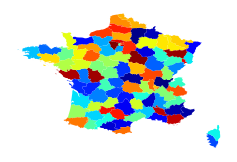

In [4]:
ax = france_metropolitan.plot(figsize=(4,4),column='nom', cmap='jet')
# Turns off-grid on the left Axis.
ax.grid(False)
ax.axis('off')

### Merge the base maps with consumption statistics

In [8]:
def display_avg_sector_and_year(sector, year):
    """ Display the base map with the given year and sector """
    df = df_avg_consumptions.copy()
    df = df[df['year'] == year]        
    
    fig, ax = plt.subplots(1, 1, figsize=(16,16))
    geodf = france_metropolitan.merge(df, on='code_insee')     
    
    ax.set_title("{} - {}".format(year, sector))
    geodf.plot(ax=ax, column='avg_{}'.format(sector), cmap='RdPu', legend=True)
    ax.grid(False)
    ax.axis('off')    

def display_total_sector_and_year(sector, year):
    """ Display the base map with the given year and sector """
    df = df_total_consumptions.copy()
    df = df[df['year'] == year]        
    
    fig, ax = plt.subplots(1, 1, figsize=(16,16))
    geodf = france_metropolitan.merge(df, on='code_insee')     
    
    ax.set_title("{} - {}".format(year, sector))
    geodf.plot(ax=ax, column='total_{}'.format(sector), cmap='RdPu', legend=True)
    ax.grid(False)
    ax.axis('off')    
    

def merge_total_year(year):
    """ Merge the base map and the stats on the given year """
    df = df_total_consumptions.copy()
    df = df[df['year'] == year]        
    
    df_result = france_metropolitan.merge(df, on='code_insee')     
    return df_result.set_index('code_insee')

def merge_avg_year(year):
    """ Merge the base map and the stats on the given year """
    df = df_avg_consumptions.copy()
    df = df[df['year'] == year]        
    
    df_result = france_metropolitan.merge(df, on='code_insee')     
    return df_result.set_index('code_insee')

def display_avg_row(year):
    # get all differents totals
    columns = [column for column in list(df_avg_consumptions.columns) if column.startswith('avg')]
    
    fig, axs = plt.subplots(1, len(columns)+1, figsize=(len(columns)*3, 1*3))
    
    geodf = merge_avg_year(year)
    
    axs[0].text(0.5, 0.5, year, fontsize=20)
    axs[0].grid(False)
    axs[0].axis('off')
    
    for column_index in range(1,len(columns)+1):
        axs[column_index].set_title(columns[column_index-1])
        geodf.plot(ax=axs[column_index], column=columns[column_index-1], cmap='RdPu')
        axs[column_index].grid(False)
        axs[column_index].axis('off')    
            
def display_total_rows():
    # get all differents totals
    columns = [column for column in list(df_total_consumptions.columns) if column.startswith('total')]
    
    # get distinc years
    years = df_total_consumptions['year'].unique()
    years.sort()
    
    # build the figure
    fig, axs = plt.subplots(len(years), len(columns)+1, figsize=(len(columns)*3, len(years)*3))
    
    # plot each row
    for year_index in range(len(years)):
        geodf = merge_total_year(years[year_index])
        axs[year_index, 0].text(0.5, 0.5, years[year_index], fontsize=20)
        axs[year_index, 0].grid(False)
        axs[year_index, 0].axis('off')
        
        for column_index in range(1,len(columns)+1):
            axs[year_index, column_index].set_title(columns[column_index-1])
            geodf.plot(ax=axs[year_index, column_index], column=columns[column_index-1], cmap='RdPu')
            axs[year_index, column_index].grid(False)
            axs[year_index, column_index].axis('off')    

def display_avg_rows():
    # get all differents totals
    columns = [column for column in list(df_avg_consumptions.columns) if column.startswith('avg')]
    
    # get distinc years
    years = df_avg_consumptions['year'].unique()
    years.sort()
    
    # build the figure
    fig, axs = plt.subplots(len(years), len(columns)+1, figsize=(len(columns)*3, len(years)*3))
    
    # plot each row
    for year_index in range(len(years)):
        geodf = merge_avg_year(years[year_index])
        axs[year_index, 0].text(0.5, 0.5, years[year_index], fontsize=20)
        axs[year_index, 0].grid(False)
        axs[year_index, 0].axis('off')
        
        for column_index in range(1,len(columns)+1):
            axs[year_index, column_index].set_title(columns[column_index-1])
            geodf.plot(ax=axs[year_index, column_index], column=columns[column_index-1], cmap='RdPu')
            axs[year_index, column_index].grid(False)
            axs[year_index, column_index].axis('off')    

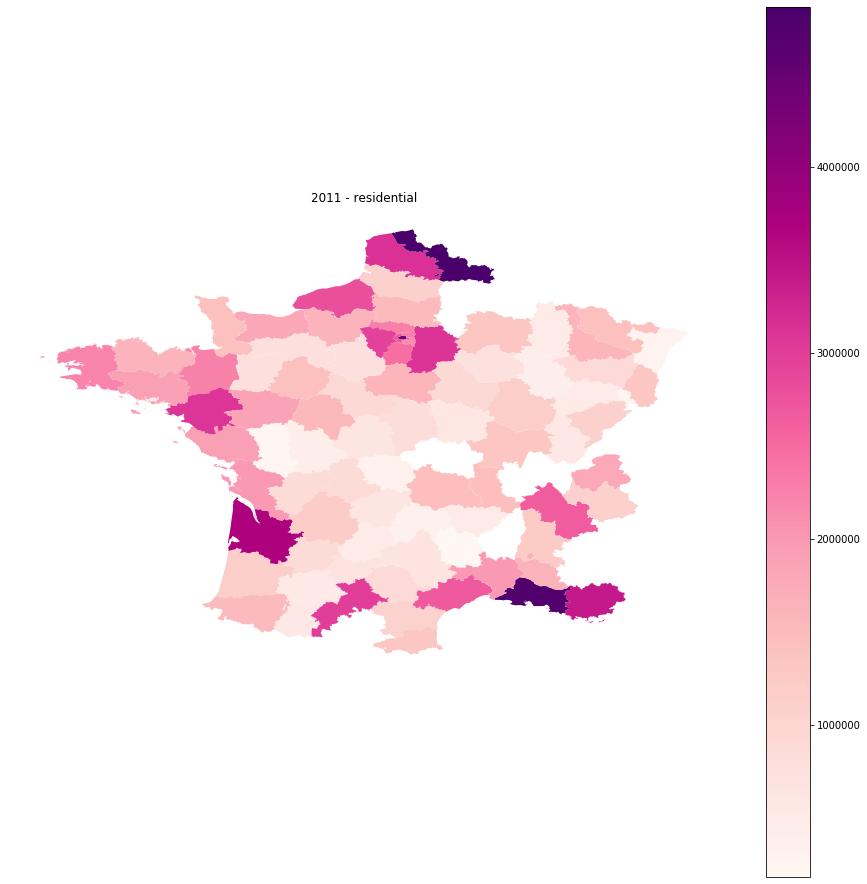

In [10]:
# display_avg_rows()
display_total_sector_and_year('residential', 2011)

## Rankings

### Residential electric power average consumption ranking

In [7]:
df_avg_consumptions[df_avg_consumptions['year'] == 2017].sort_values('avg_residential', ascending=False)

,code_insee,year,avg_residential,avg_pro,avg_farming,avg_industry,avg_tertiary
172,82,2017,6.073,9.631,74.015310,365.934782,254.495188
17,84,2017,5.897,9.870,115.452695,450.731156,244.277381
315,27,2017,5.894,9.995,94.036558,1179.885733,254.985467
19,28,2017,5.843,9.005,68.779700,721.384072,265.259696
3,1,2017,5.811,9.371,173.624584,780.762368,235.026655
...,...,...,...,...,...,...,...
594,48,2017,3.707,7.157,152.760900,340.425144,161.513190
24,93,2017,3.575,11.122,56.108286,325.655514,323.720813
178,94,2017,3.557,10.333,60.630235,334.897762,297.012234
449,92,2017,3.416,9.440,229.743955,404.111022,289.559684
